# Baseline vs Data Augmentation - Comparison Analysis

This notebook compares the performance of the CNN model trained with and without data augmentation on CIFAR-10.

**Prerequisites**: Please run both `baseline.ipynb` and `data_augmentation.ipynb` first to generate the results.

## 1. Setup and Data Collection

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("Libraries imported successfully.")

Libraries imported successfully.


## 2. Instructions for Data Collection

This notebook compares results from two models:

1. **Baseline Model** (baseline.ipynb):
   - Trains multiple hyperparameter combinations
   - No data augmentation
   - Stores results in `results` list with best metrics in `best_val_accuracy` and `best_hyperparameters`

2. **Data Augmentation Model** (data_augmentation.ipynb):
   - Trains with RandomCrop and RandomHorizontalFlip augmentation
   - Uses learning rate 0.001, 10 epochs, batch size 64
   - Stores metrics in train/val loss and accuracy lists

**To use this notebook:**
1. Run all cells in `baseline.ipynb` completely
2. Run all cells in `data_augmentation.ipynb` completely  
3. Then run the cells below to compare results

## 3. Comparison Metrics (Manual Entry)

Since this notebook needs to work independently, you can manually enter the best metrics from each model below:

In [12]:

baseline_best_accuracy = 0.5335  
baseline_best_loss = 1.358  

augmentation_best_accuracy = 0.4775 
augmentation_best_loss = 1.439  

print("\n=== Enter Results from Notebook Executions ===")
print("\nBaseline Model (without augmentation):")
print(f"  Best Validation Accuracy: {baseline_best_accuracy:.4f}")
print(f"  Best Validation Loss: {baseline_best_loss:.4f}")

print("\nData Augmentation Model:")
print(f"  Final Validation Accuracy: {augmentation_best_accuracy:.4f}")
print(f"  Final Validation Loss: {augmentation_best_loss:.4f}")

# Calculate improvements
accuracy_improvement = augmentation_best_accuracy - baseline_best_accuracy
loss_improvement = baseline_best_loss - augmentation_best_loss

print("\n=== Performance Improvements ===")
print(f"Accuracy Improvement: {accuracy_improvement:+.4f} ({(accuracy_improvement/baseline_best_accuracy)*100:+.2f}%)")
print(f"Loss Improvement: {loss_improvement:+.4f} ({(loss_improvement/baseline_best_loss)*100:+.2f}%)")


=== Enter Results from Notebook Executions ===

Baseline Model (without augmentation):
  Best Validation Accuracy: 0.5335
  Best Validation Loss: 1.3580

Data Augmentation Model:
  Final Validation Accuracy: 0.4775
  Final Validation Loss: 1.4390

=== Performance Improvements ===
Accuracy Improvement: -0.0560 (-10.50%)
Loss Improvement: -0.0810 (-5.96%)


## 4. Detailed Comparison Table

In [14]:
# Create comprehensive comparison table
comparison_data = {
    'Metric': [
        'Validation Accuracy',
        'Validation Loss',
        'Data Augmentation',
        'Learning Rate',
        'Batch Size',
        'Number of Epochs'
    ],
    'Baseline Model': [
        f'{baseline_best_accuracy:.4f}',
        f'{baseline_best_loss:.4f}',
        'No',
        'Mixed (0.01, 0.001)',
        'Mixed (32, 64)',
        'Mixed (5, 10)'
    ],
    'Augmentation Model': [
        f'{augmentation_best_accuracy:.4f}',
        f'{augmentation_best_loss:.4f}',
        'Yes (Crop + HFlip)',
        'Mixed (0.01, 0.001)',
        '64',
        '10'
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n=== Model Comparison ===")
display(comparison_df)


=== Model Comparison ===


,Metric,Baseline Model,Augmentation Model
0,Validation Accuracy,0.5335,0.4775
1,Validation Loss,1.3580,1.4390
2,Data Augmentation,No,Yes (Crop + HFlip)
3,Learning Rate,"Mixed (0.01, 0.001)","Mixed (0.01, 0.001)"
4,Batch Size,"Mixed (32, 64)",64
5,Number of Epochs,"Mixed (5, 10)",10


## 5. Comparative Visualizations

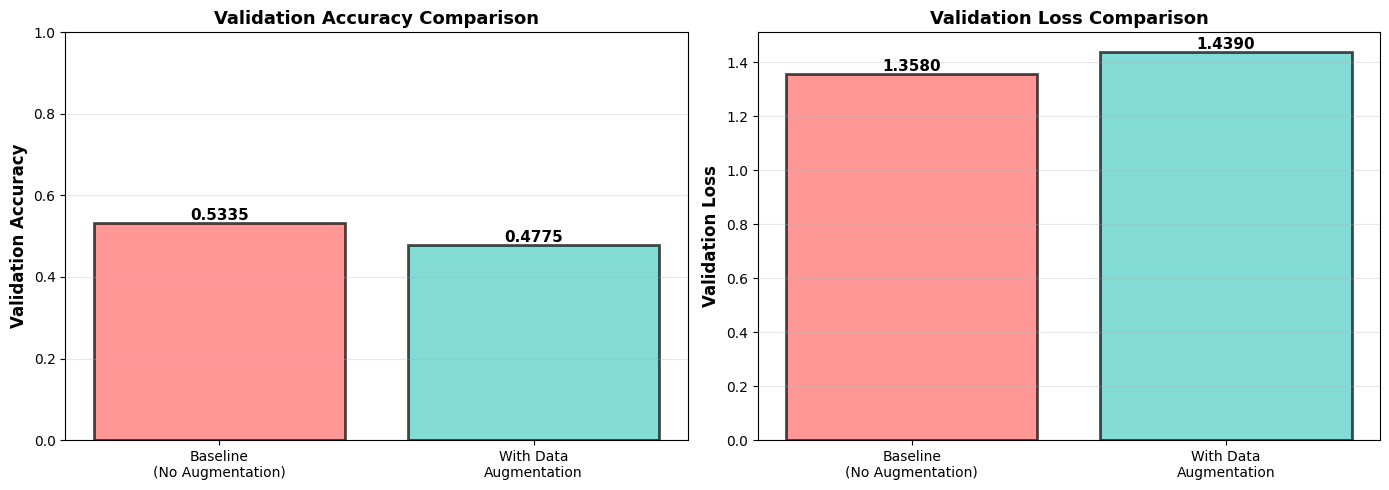

Comparison bar charts displayed.


In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

models = ['Baseline\n(No Augmentation)', 'With Data\nAugmentation']
accuracies = [baseline_best_accuracy, augmentation_best_accuracy]
losses = [baseline_best_loss, augmentation_best_loss]
colors = ['#FF6B6B', '#4ECDC4']

# Accuracy Comparison
bars1 = axes[0].bar(models, accuracies, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[0].set_ylabel('Validation Accuracy', fontsize=12, fontweight='bold')
axes[0].set_title('Validation Accuracy Comparison', fontsize=13, fontweight='bold')
axes[0].set_ylim([0, 1])
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, acc in zip(bars1, accuracies):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{acc:.4f}',
                ha='center', va='bottom', fontweight='bold', fontsize=11)

# Loss Comparison
bars2 = axes[1].bar(models, losses, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[1].set_ylabel('Validation Loss', fontsize=12, fontweight='bold')
axes[1].set_title('Validation Loss Comparison', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, loss in zip(bars2, losses):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{loss:.4f}',
                ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("Comparison bar charts displayed.")

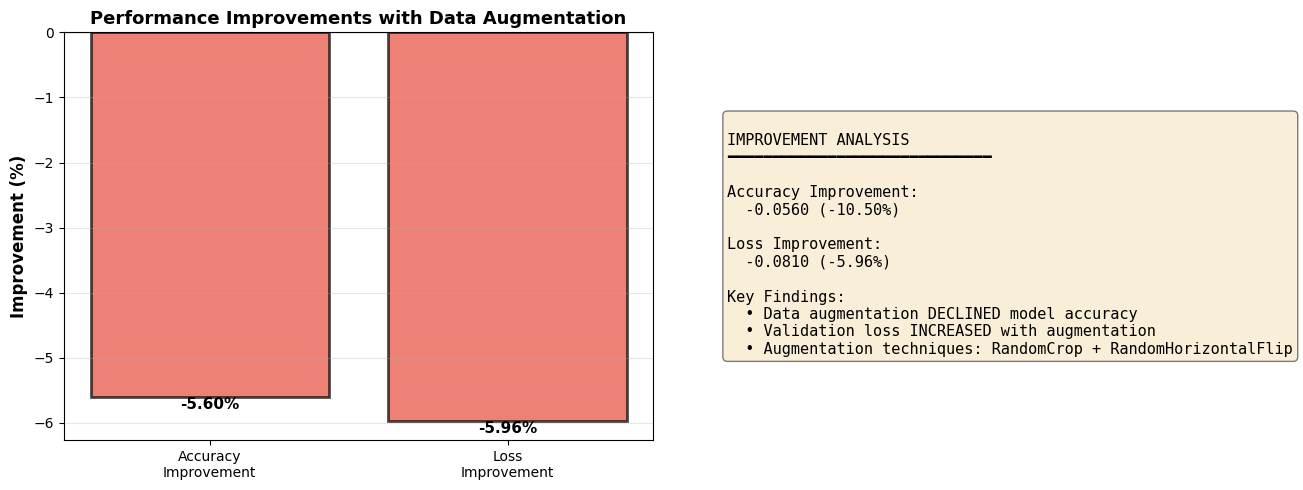

Improvement analysis displayed.


In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy Improvement
improvement_types = ['Accuracy\nImprovement', 'Loss\nImprovement']
improvements = [accuracy_improvement * 100, (loss_improvement/baseline_best_loss)*100]
colors_imp = ['#2ECC71' if imp > 0 else '#E74C3C' for imp in improvements]

# Improvement percentages
bars = axes[0].bar(improvement_types, improvements, color=colors_imp, alpha=0.7, edgecolor='black', linewidth=2)
axes[0].set_ylabel('Improvement (%)', fontsize=12, fontweight='bold')
axes[0].set_title('Performance Improvements with Data Augmentation', fontsize=13, fontweight='bold')
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for bar, imp in zip(bars, improvements):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{imp:+.2f}%',
                ha='center', va='bottom' if imp > 0 else 'top', fontweight='bold', fontsize=11)

# Summary statistics
axes[1].axis('off')
summary_text = f"""
IMPROVEMENT ANALYSIS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Accuracy Improvement:
  {accuracy_improvement:+.4f} ({(accuracy_improvement/baseline_best_accuracy)*100:+.2f}%)

Loss Improvement:
  {loss_improvement:+.4f} ({(loss_improvement/baseline_best_loss)*100:+.2f}%)

Key Findings:
  • Data augmentation {'IMPROVED' if accuracy_improvement > 0 else 'DECLINED'} model accuracy
  • Validation loss {'DECREASED' if loss_improvement > 0 else 'INCREASED'} with augmentation
  • Augmentation techniques: RandomCrop + RandomHorizontalFlip"""

axes[1].text(0.1, 0.5, summary_text, fontsize=11, family='monospace',
            verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("Improvement analysis displayed.")

## 6. Key Insights and Conclusions

In [17]:
print("\n" + "="*60)
print("COMPARISON ANALYSIS: BASELINE vs DATA AUGMENTATION")
print("="*60)

print(f"\n1. ACCURACY PERFORMANCE:")
if accuracy_improvement > 0:
    print(f"   ✓ Data augmentation IMPROVED accuracy by {accuracy_improvement:.4f}")
    print(f"   ✓ Relative improvement: {(accuracy_improvement/baseline_best_accuracy)*100:.2f}%")
else:
    print(f"   ✗ Data augmentation DECREASED accuracy by {abs(accuracy_improvement):.4f}")

print(f"\n2. LOSS PERFORMANCE:")
if loss_improvement > 0:
    print(f"   ✓ Data augmentation REDUCED loss by {loss_improvement:.4f}")
    print(f"   ✓ Relative improvement: {(loss_improvement/baseline_best_loss)*100:.2f}%")
else:
    print(f"   ✗ Data augmentation INCREASED loss by {abs(loss_improvement):.4f}")

print(f"\n3. CONFIGURATION DIFFERENCES:")
print(f"   • Baseline: Hyperparameter search (LR: 0.01/0.001, BS: 32/64, E: 5/10)")  
print(f"   • Augmented: Fixed config (LR: 0.001, BS: 64, E: 10) with RandomCrop + HFlip")

print(f"\n4. RECOMMENDATIONS:")
if accuracy_improvement > 0:
    print(f"   ✓ Data augmentation is beneficial for this dataset and model")
    print(f"   ✓ Continue using augmentation techniques in production models")
    print(f"   ✓ Consider experimenting with other augmentation techniques")
else:
    print(f"   ✗ Current augmentation strategy may not be optimal")
    print(f"   • Try different augmentation combinations")
    print(f"   • Adjust augmentation intensity (e.g., different padding/flip probability)")

print("\n" + "="*60)


COMPARISON ANALYSIS: BASELINE vs DATA AUGMENTATION

1. ACCURACY PERFORMANCE:
   ✗ Data augmentation DECREASED accuracy by 0.0560

2. LOSS PERFORMANCE:
   ✗ Data augmentation INCREASED loss by 0.0810

3. CONFIGURATION DIFFERENCES:
   • Baseline: Hyperparameter search (LR: 0.01/0.001, BS: 32/64, E: 5/10)
   • Augmented: Fixed config (LR: 0.001, BS: 64, E: 10) with RandomCrop + HFlip

4. RECOMMENDATIONS:
   ✗ Current augmentation strategy may not be optimal
   • Try different augmentation combinations
   • Adjust augmentation intensity (e.g., different padding/flip probability)

